In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_EarthTemp= pd.read_csv('/content/earth_surface_temperatures.csv')
print(df_EarthTemp.head(5))
print(df_EarthTemp.shape)

   Years  Month      Country  Temperature  Monthly_variation  Anomaly
0   1848      5  Afghanistan       19.573             -0.297    2.037
1   1848      6  Afghanistan       23.894             -0.796    2.136
2   1848      7  Afghanistan       26.507             -0.113    1.937
3   1848      8  Afghanistan       24.498             -0.462    1.937
4   1848      9  Afghanistan       19.068             -1.272    1.865
(534571, 6)


**`PART: a`**

---

Identify and rectify any missing values in the data using appropriate
techniques.

In [4]:
#how to find the null values
df_EarthTemp.isna()
df_EarthTemp.isna().sum()

Years                    0
Month                    0
Country                  0
Temperature          25753
Monthly_variation    25753
Anomaly              25753
dtype: int64

In [5]:
df_EarthTemp['Temperature'].fillna(df_EarthTemp['Temperature'].mean(), inplace=True)
df_EarthTemp['Monthly_variation'].fillna(df_EarthTemp['Monthly_variation'].mean(), inplace=True)
df_EarthTemp['Anomaly'].fillna(df_EarthTemp['Anomaly'].mean(), inplace=True)

df_EarthTemp.isna().sum()


Years                0
Month                0
Country              0
Temperature          0
Monthly_variation    0
Anomaly              0
dtype: int64

In [6]:
df_EarthTemp.loc[df_EarthTemp.duplicated()] #no two rows are same in this data set

,Years,Month,Country,Temperature,Monthly_variation,Anomaly


In [7]:

# Convert the DataFrame to a CSV file
df_EarthTemp.to_csv('my_data.csv', index=False)


**`PART: b`**

---
Ensure that the data types of all columns are consistent with their
values and make conversions where necessary.

In [8]:
#the data types of all the columns are consistent with their values
#so there is no need for the conversion
df_EarthTemp.dtypes

Years                  int64
Month                  int64
Country               object
Temperature          float64
Monthly_variation    float64
Anomaly              float64
dtype: object

**`PART: c`**

---
Transform the Years and Month columns into a single column
labeled "Date" in the MM-YYYY format, with a datetime64[ns] data
type. For example, the year 1848 and month 5 should be unified as a
single value, such as 5-1848.


In [9]:
# Create the "Date" column by combining "Month" and "Years" in 'MM-YYYY' format
df_EarthTemp['Date'] = df_EarthTemp['Month'].astype(str) + '-' + df_EarthTemp['Years'].astype(str)
df_EarthTemp['Date'] = pd.to_datetime(df_EarthTemp['Date'])      # Convert the "Date" column to datetime with only month and year
df_EarthTemp['Date'] = df_EarthTemp['Date'].dt.strftime('%m-%Y') # Format the "Date" column to display only 'MM-YYYY'
print(df_EarthTemp.head(10))
print(df_EarthTemp.shape)


   Years  Month      Country  Temperature  Monthly_variation  Anomaly     Date
0   1848      5  Afghanistan       19.573             -0.297    2.037  05-1848
1   1848      6  Afghanistan       23.894             -0.796    2.136  06-1848
2   1848      7  Afghanistan       26.507             -0.113    1.937  07-1848
3   1848      8  Afghanistan       24.498             -0.462    1.937  08-1848
4   1848      9  Afghanistan       19.068             -1.272    1.865  09-1848
5   1848     10  Afghanistan       13.086             -0.934    1.880  10-1848
6   1848     11  Afghanistan        6.841             -0.769    1.835  11-1848
7   1848     12  Afghanistan        1.198             -1.842    2.034  12-1848
8   1849      1  Afghanistan        0.585             -0.095    2.550  01-1849
9   1849      2  Afghanistan        2.710             -0.560    2.098  02-1849
(534571, 7)


**`PART: d`**

---
Detect and investigate extreme temperature values that might be
regarded as outliers.

In [10]:

# Calculate the z-scores for the "Temperature" column
z_scores = (df_EarthTemp['Temperature'] - df_EarthTemp['Temperature'].mean()) / df_EarthTemp['Temperature'].std()

# Define a z-score threshold (e.g., 2 for common outlier detection)
z_score_threshold = 3

# Identify and flag outliers using the threshold
outliers = df_EarthTemp[abs(z_scores) > z_score_threshold]

# Display the rows containing outliers
outliers.head(10)
outliers.shape


(6248, 7)

In [11]:
df_EarthTemp_no_outliers = df_EarthTemp[~(abs(z_scores) > z_score_threshold)]

# Display the resulting DataFrame with outliers removed
print("DataFrame without outliers:")
print(df_EarthTemp_no_outliers.head(5))
print(df_EarthTemp_no_outliers.shape)


DataFrame without outliers:
   Years  Month      Country  Temperature  Monthly_variation  Anomaly     Date
0   1848      5  Afghanistan       19.573             -0.297    2.037  05-1848
1   1848      6  Afghanistan       23.894             -0.796    2.136  06-1848
2   1848      7  Afghanistan       26.507             -0.113    1.937  07-1848
3   1848      8  Afghanistan       24.498             -0.462    1.937  08-1848
4   1848      9  Afghanistan       19.068             -1.272    1.865  09-1848
(528323, 7)


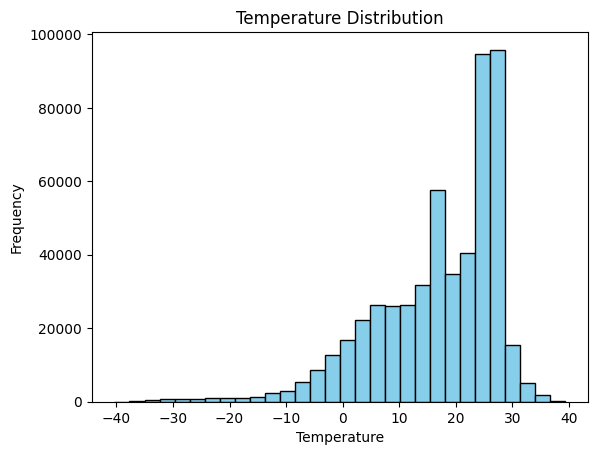

In [12]:
#histogram
plt.hist(df_EarthTemp['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

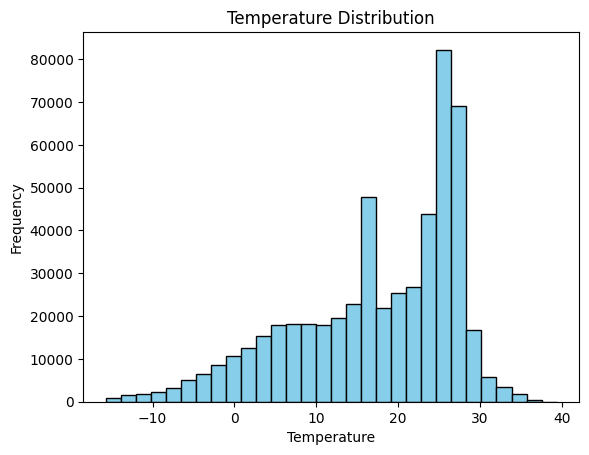

In [13]:
#histogram
plt.hist(df_EarthTemp_no_outliers['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

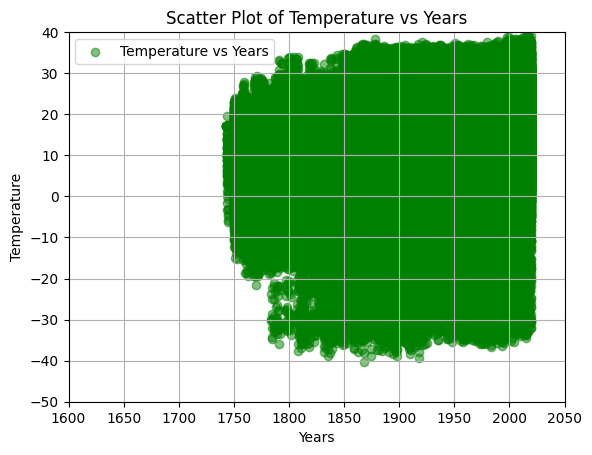

In [14]:
plt.scatter(df_EarthTemp['Years'], df_EarthTemp['Temperature'], alpha=0.5, c='green', label='Temperature vs Years')
plt.title('Scatter Plot of Temperature vs Years')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xlim(1600, 2050)  # Adjust the range for the x-axis
plt.ylim(-50, 40)       # Adjust the range for the y-axis
plt.show()


**`PART: e`**

---
Compute summary statistics for temperature, monthly variation, and
anomaly values, including mean, median, standard deviation, and
range.


In [15]:
df_EarthTemp_no_outliers.columns

Index(['Years', 'Month', 'Country', 'Temperature', 'Monthly_variation',
       'Anomaly', 'Date'],
      dtype='object')

In [16]:
df=df_EarthTemp_no_outliers.drop(['Country','Date','Years','Month'],axis=1 )
print(df.describe())
# Calculate the range (max - min)
temperature_range = df_EarthTemp['Temperature'].max() - df_EarthTemp['Temperature'].min()
monthly_variation_range = df_EarthTemp['Monthly_variation'].max() - df_EarthTemp['Monthly_variation'].min()
anomaly_range = df_EarthTemp['Anomaly'].max() - df_EarthTemp['Anomaly'].min()

print(f"Range for Temperature is: {temperature_range}")
print(f"Range for Monthly Variation range is: {monthly_variation_range}")
print(f"Range for Anomaly Range is: {anomaly_range}")


         Temperature  Monthly_variation       Anomaly
count  528323.000000      528323.000000  528323.00000
mean       17.550386          -0.069856       0.87868
std         9.991044           1.180757       1.03483
min       -15.726000         -10.566000       0.03700
25%        10.921000          -0.618000       0.30000
50%        20.014000          -0.075495       0.52000
75%        25.807000           0.508000       0.94400
max        39.384000          11.817000      12.20300
Range for Temperature is: 79.733
Range for Monthly Variation range is: 22.383000000000003
Range for Anomaly Range is: 12.165999999999999


**`PART: f`**

---
Identify the countries included in the dataset and calculate their
average temperature values.


In [17]:
mean_temp_of_every_country = df_EarthTemp.groupby('Country')['Temperature'].mean()
print(mean_temp_of_every_country)

Country
Afghanistan       14.476292
Albania           12.760633
Algeria           22.063457
American Samoa    25.880581
Andorra           11.142018
                    ...    
Virgin Islands    25.354143
Western Sahara    23.297923
Yemen             26.169337
Zambia            21.356084
Zimbabwe          21.185253
Name: Temperature, Length: 233, dtype: float64


**`PART: g`**

---
Determine the overall trend in global temperatures over the years and
visualize this trend using a suitable chart.


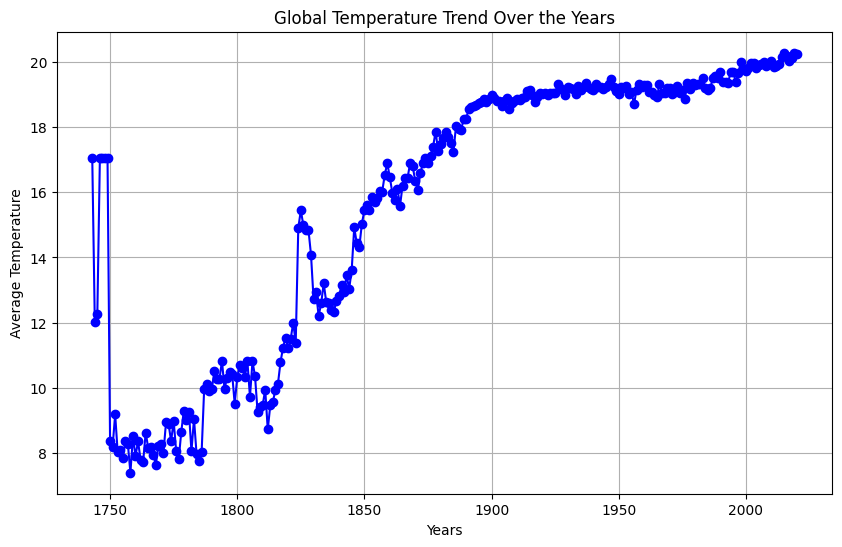

In [18]:
# Group the data by 'Year' and calculate the average temperature for each year
average_temperature_by_year = df_EarthTemp_no_outliers.groupby('Years')['Temperature'].mean()

# Create a line chart to visualize the temperature trend over the years
plt.figure(figsize=(10, 6))
plt.plot(average_temperature_by_year.index, average_temperature_by_year.values, marker='o', linestyle='-', color='blue')
plt.title('Global Temperature Trend Over the Years')
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.grid(True)

plt.show()

**`PART: h`**

---
Identify the months with the highest and lowest temperatures for each
country and find out whether there are noticeable seasonal patterns
in the temperature data.


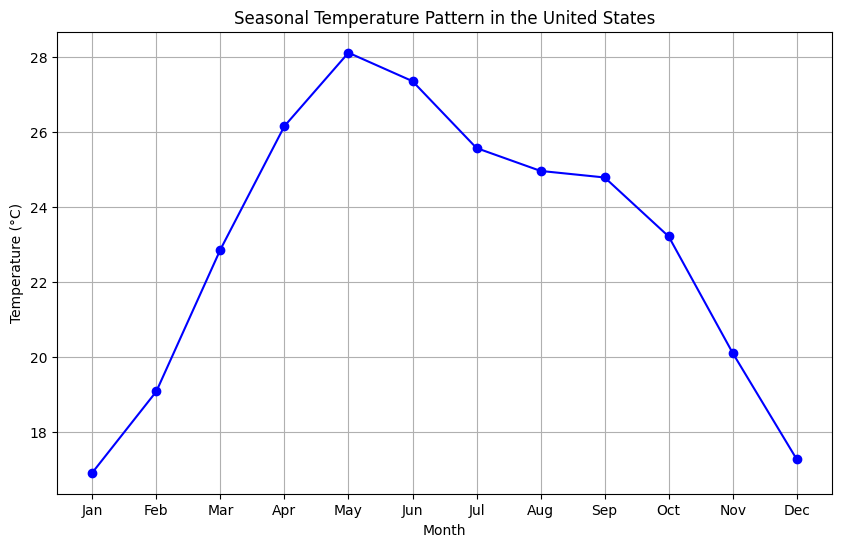

In [40]:
monthly_temperatures = df_EarthTemp_no_outliers.groupby(['Country', 'Month'])['Temperature'].mean().reset_index()
max_temperatures = monthly_temperatures.groupby('Country')['Temperature'].idxmax()
min_temperatures = monthly_temperatures.groupby('Country')['Temperature'].idxmin()

hottest_months = monthly_temperatures.loc[max_temperatures]
coldest_months = monthly_temperatures.loc[min_temperatures]


# Example: Visualizing seasonal patterns for the United States
us_data = monthly_temperatures[monthly_temperatures['Country'] == 'Pakistan']

plt.figure(figsize=(10, 6))
plt.plot(us_data['Month'], us_data['Temperature'], marker='o', linestyle='-', color='blue')
plt.title('Seasonal Temperature Pattern in the Pakistan')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


**`PART: j`**

---
Choose five countries and compare the trends in their temperatures
over the years, seeking any similar temperature patterns.


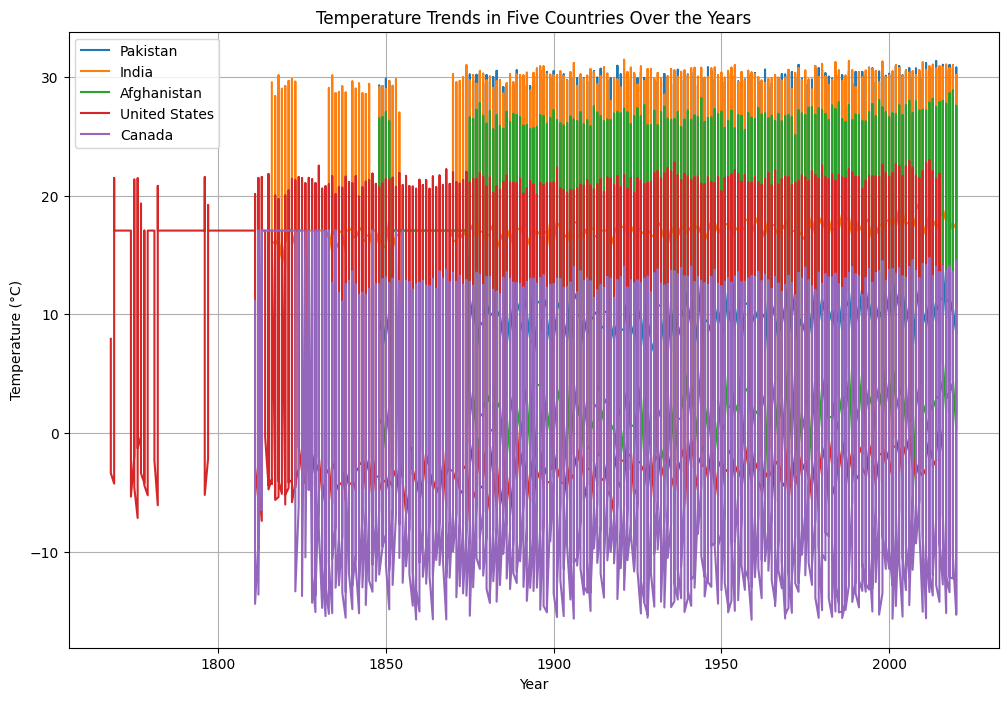

In [29]:

# List of five countries to compare
countries_to_compare = ['Pakistan', 'India','Afghanistan','United States','Canada']
plt.figure(figsize=(12, 8))

for country in countries_to_compare:
    country_data = df_EarthTemp_no_outliers[df_EarthTemp_no_outliers['Country'] == country]
    plt.plot(country_data['Years'], country_data['Temperature'], label=country)

plt.title('Temperature Trends in Five Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

**`PART: k`**

---
Explore the potential correlation between temperature and monthly
variation or anomaly values. Calculate correlation coefficients and
create scatterplots to investigate this relationship.


In [37]:
#column names are "Temperature" "Monthly_variation" and "Anomaly"
correlation=df_EarthTemp_no_outliers['Temperature'].corr(df_EarthTemp_no_outliers['Monthly_variation'])
print(f"the correlation between Temperature and Monthly variation is: {correlation}")
if(correlation>0):
 print("relation is positive.")
elif(correlation<0):
 print("relation is positive.")
else:
 print("no relation.")

the correlation between Temperature and Monthly variation is: 0.16207704266351314
relation is positive.
